# Assignment-3 Problem Statement :- Build CNN Model for Classification Of Flowers

# ● Download the Dataset

# ● Image Augmentation


In [2]:
import tensorflow 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
x_train = train_datagen.flow_from_directory(r"C:\Users\mstof\Downloads\Flowers-Dataset\flowers",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


# ● Create Model


In [6]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

# ● Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [12]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [13]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

# ● Compile The Model


In [14]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

# ● Fit The Model

In [15]:
model.fit(x_train,steps_per_epoch=135,epochs=50)

Epoch 1/50
135/135 [==============================] - 23s 163ms/step - loss: 1.2656 - accuracy: 0.4617
Epoch 2/50
135/135 [==============================] - 20s 149ms/step - loss: 0.9821 - accuracy: 0.6034
Epoch 3/50
135/135 [==============================] - 19s 141ms/step - loss: 0.6702 - accuracy: 0.7464
Epoch 4/50
135/135 [==============================] - 21s 152ms/step - loss: 0.4049 - accuracy: 0.8559
Epoch 5/50
135/135 [==============================] - 23s 172ms/step - loss: 0.1788 - accuracy: 0.9460
Epoch 6/50
135/135 [==============================] - 22s 160ms/step - loss: 0.0907 - accuracy: 0.9761
Epoch 7/50
135/135 [==============================] - 21s 155ms/step - loss: 0.0373 - accuracy: 0.9910
Epoch 8/50
135/135 [==============================] - 20s 147ms/step - loss: 0.0549 - accuracy: 0.9873
Epoch 9/50
135/135 [==============================] - 19s 138ms/step - loss: 0.0509 - accuracy: 0.9886
Epoch 10/50
135/135 [==============================] - 19s 139ms/step - l

# ● Save The Model

In [18]:
model.save("Flowers.h5")

# ● Test The Model

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model = load_model("Flowers.h5")

In [60]:
img = image.load_img("jbskk.jpg",target_size=(64,64))

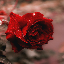

In [61]:
img

In [62]:
type(img)

PIL.Image.Image

In [63]:
x=image.img_to_array(img)

In [64]:
x

array([[[118.,  81.,  63.],
        [131.,  83.,  71.],
        [127.,  79.,  67.],
        ...,
        [140.,  98.,  76.],
        [146., 104.,  82.],
        [157., 114.,  95.]],

       [[147.,  98.,  84.],
        [161.,  99.,  88.],
        [166., 100.,  88.],
        ...,
        [151., 109.,  87.],
        [158., 115.,  96.],
        [162., 124., 105.]],

       [[162., 110.,  97.],
        [174., 104.,  94.],
        [172.,  98.,  85.],
        ...,
        [146., 108.,  89.],
        [157., 120., 101.],
        [163., 127., 111.]],

       ...,

       [[126.,  94.,  83.],
        [114.,  84.,  73.],
        [161., 120., 114.],
        ...,
        [ 88.,  66.,  53.],
        [ 89.,  67.,  54.],
        [ 95.,  71.,  59.]],

       [[ 13.,  13.,  13.],
        [ 44.,  18.,  17.],
        [ 99.,  61.,  52.],
        ...,
        [100.,  76.,  64.],
        [108.,  84.,  72.],
        [106.,  84.,  71.]],

       [[ 13.,  13.,  15.],
        [ 12.,  13.,  15.],
        [ 12.,  

In [65]:
x.shape

(64, 64, 3)

In [66]:
import numpy as np

In [67]:
x=np.expand_dims(x,axis=0)

In [68]:
x.shape

(1, 64, 64, 3)

In [69]:
pred_prob=model.predict(x)

1/1 [==============================] - 0s 41ms/step


In [70]:
pred_prob

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [71]:
class_name=np.array(["daisy","dandelion","rose","sunflower","tulip"])
pred_id=pred_prob.argmax(axis=1)

In [72]:
pred_id

array([2], dtype=int64)

In [73]:
print("The pedicted flower is",str(class_name[pred_id]))

The pedicted flower is ['rose']


# END OF THE ASSIGNMENT